00:35:06 - cmdstanpy - INFO - Chain [1] start processing
00:35:06 - cmdstanpy - INFO - Chain [1] done processing


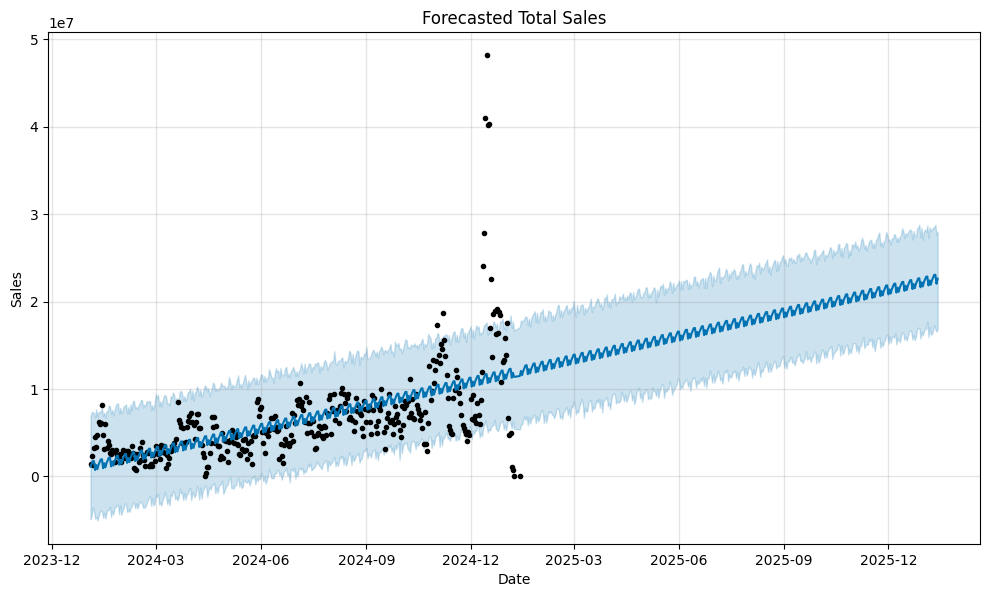

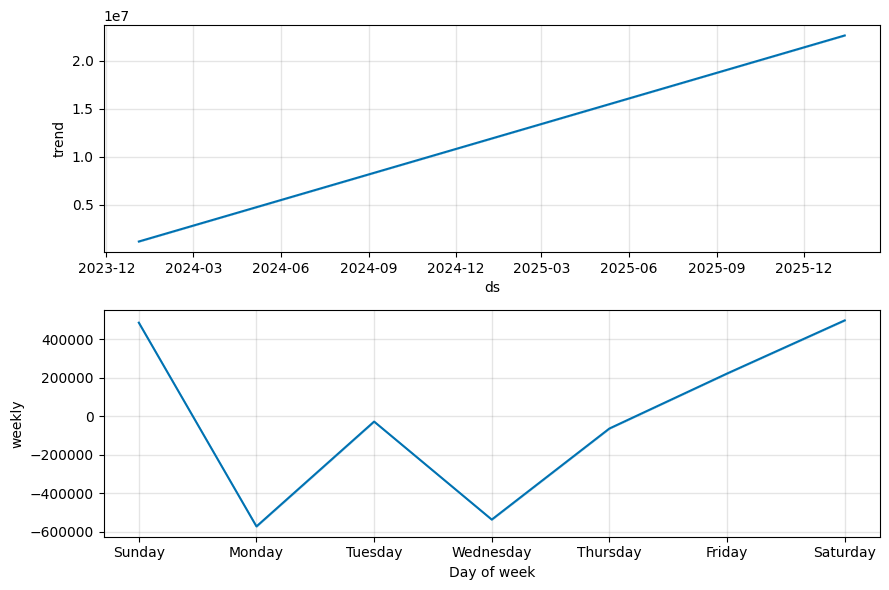

In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import sys
sys.path.append('../scripts')
from load_data import load_and_clean_data

# Group by daily sales
df = load_and_clean_data()
daily_sales = df.groupby(df['order_completion_date'].dt.date)['total_price'].sum().reset_index()
daily_sales.columns = ['ds', 'y']

# Initialize Prophet
model = Prophet(changepoints=['2024-11-10', '2024-12-31'], changepoint_prior_scale=0.01)
model.fit(daily_sales)

# Create future DataFrame
future = model.make_future_dataframe(periods=365) #30 days forecast

# Predict
forecast = model.predict(future)

# Plot
firstFigure = model.plot(forecast)
plt.title('Forecasted Total Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Plot trend
secondFigure = model.plot_components(forecast)
plt.show()



